<a href="https://colab.research.google.com/github/scadriano/lia1-2023-2/blob/main/Introdu%C3%A7%C3%A3o%20Aprendizado%20de%20M%C3%A1quina/08_Aula_08_Aprendizado_de_M%C3%A1quina_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Machine Learning e Data Science - Classificação (1)**
Faremos a previsão de risco de concessão de crédito o cliente, usando algoritmo de Árvore de Decisão.

## Pré-processamento

In [1]:
# Carregar a base de dados
import pandas as pd
base_risco_credito = pd.read_csv('tenis.csv')

Atributos previsores (historia, divida, garantias, renda) - Atributo Classe (risco)

In [2]:
# Observarmos os registros (14)
base_risco_credito

,tempo,temperatura,humidade,vento,jogar tenis
0,ensolarado,quente,alta,fraco,nao
1,ensolarado,quente,alta,forte,nao
2,nublado,quente,alta,fraco,sim
3,chuvoso,moderada,alta,fraco,sim
4,chuvoso,agradavel,normal,fraco,sim
5,chuvoso,agradavel,normal,forte,nao
6,nublado,agradavel,normal,forte,sim
7,ensolarado,moderada,alta,fraco,nao
8,ensolarado,agradavel,normal,fraco,sim
9,chuvoso,moderada,normal,fraco,sim


### Separar em duas variáveis (X, y)

In [19]:
# Variável com os Previsores (X)
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [20]:
# Variável com a Classe (y)
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

### Conversão dos Atributos

In [21]:
# Conversão de Atributos de Categóricos para Numéricos
from sklearn.preprocessing import LabelEncoder

# Instanciar o objeto da classe LabelEncoder por variável
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [22]:
# Aplicar o processamento da conversão
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [23]:
X_risco_credito

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

### Salvar o arquivo .PKL

In [24]:
# Salvar/criar o arquivo com as duas variáveis
import pickle
with open('tenis.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

## Implementar o Algoritmo -> Árvore de decisão

In [25]:
# Importar o classificador baseado em Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Abrir o arquivo .pkl
with open('tenis.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [27]:
# Ver a variável - previsores
X_risco_credito

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [28]:
# Ver a variável - classe (alto, moderado ou baixo)
y_risco_credito

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

### Treinar o "algoritmo <-> dados" - Gerar a árvore - Modelo!

In [29]:
# Criar a árvore de decisão
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

# Treinamento
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [30]:
# Qual atributo mais importante
arvore_risco_credito.feature_importances_

array([0.51455805, 0.        , 0.21123658, 0.27420537])

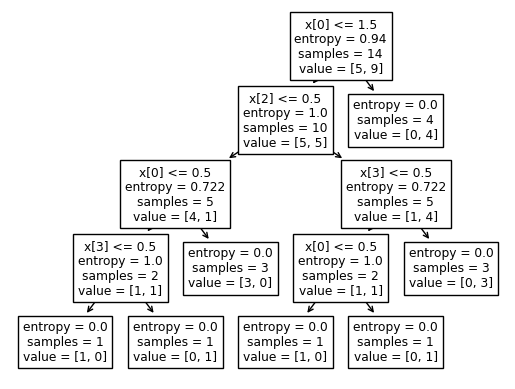

In [31]:
# Visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_risco_credito);

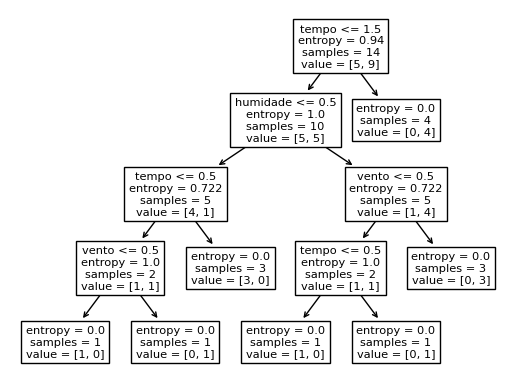

In [35]:
# Melhorar a visualização da árvore de decisão
previsores = ['tempo', 'temperatura', 'humidade', 'vento']
tree.plot_tree(arvore_risco_credito, feature_names=previsores);

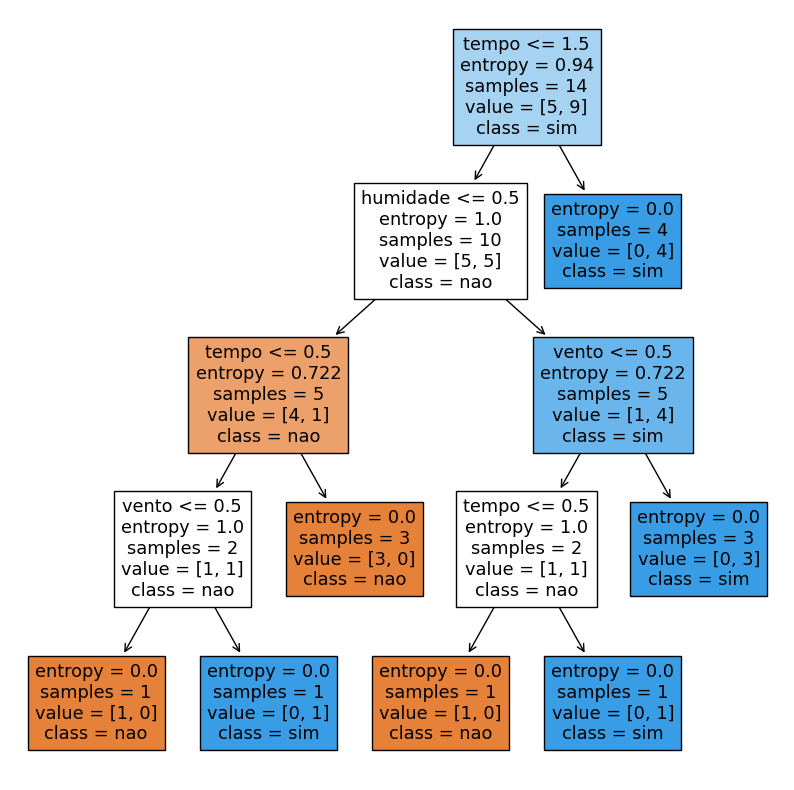

In [36]:
# Melhorar um pouco mais a visualização
import matplotlib.pyplot as plt
previsores = ['tempo', 'temperatura', 'humidade', 'vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

## Testar o modelo -> Informar registros de clientes

In [37]:


# Todos Clientes da Base de Dados - Teste!
previsoes = arvore_risco_credito.predict([
    [1, 1, 1, 2],  # ensolarado, moderada, normal, forte
    [0, 0, 1, 1],  # chuvoso, agradável, normal, fraco
    [2, 2, 1, 2],  # nublado, quente, normal, forte
    [2, 0, 0, 2]   # nublado, agradável, alta, forte
])
#previsoes
for n in previsoes:
    print(n)

sim
sim
sim
sim
